Imports

In [4]:
%load_ext autoreload
%autoreload 2
%aimport -numpy
%aimport -torch
%aimport -gym

import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam
torch.manual_seed(0)

# for saving/loading
import os

import base64, io

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Our functions

In [7]:
from Train_policy_func import Policy, Policy_v2, device
from Generate_traj_func import generate_trajectory
from Plot_Functions import plot_suboptimality, plot_trajectory_performance, plot_Scores, plot_suboptimality_three_policies
from PPO import ppo_update, RolloutBuffer, evaluate_policy

# Training loop for OPPO
from OPPO import baseline_CartPole_V0, baseline_MountainCar, OPPO_update
from OPPO import baseline_1, baseline_CartPole_v0_Fla
from PPO_Fla import *
from pairs_generator import sample_preference_pairs
from RLHF import RewardModel, train_policy_from_rollouts_n_updates



beta by default 0.5


Creating policies and changing seeds:

C:\Users\youss\AppData\Local\Temp\ipykernel_34760\2103054751.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pi1_oppo.load_state_dict(torch.load(f"pi1_oppo_{env_name}_s

Evaluations over 100 episodes done for both policies


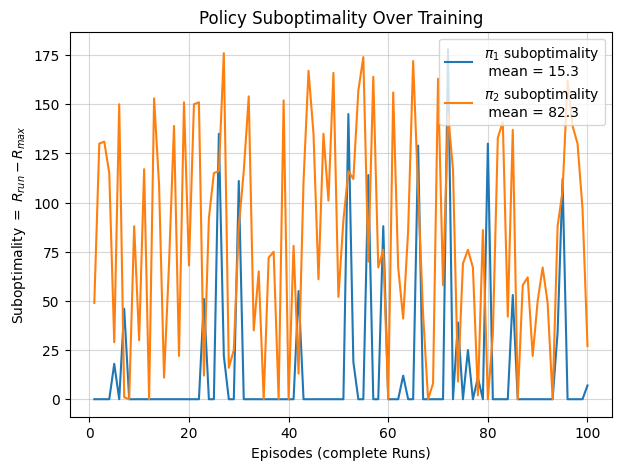

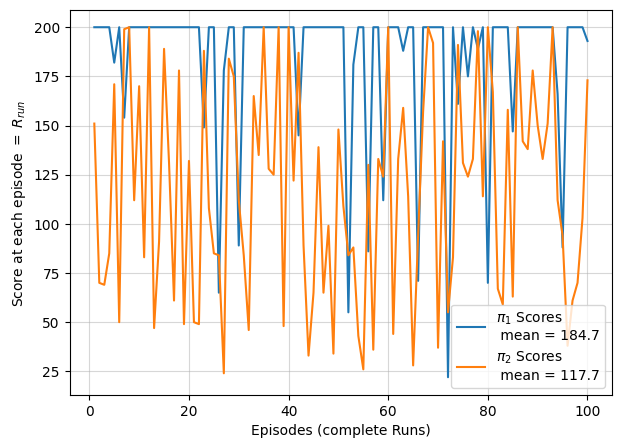

π₁ → length 200, total reward 200.0
π₂ → length 47, total reward 47.0
Collected 200 preference pairs.


C:\Users\youss\AppData\Local\Temp\ipykernel_34760\2103054751.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  reward_model.load_state_dict(torch.load(f"reward_model_yous

[Update 1/40] Avg Loss: -50.0164
[Update 2/40] Avg Loss: -53.1545
[Update 3/40] Avg Loss: -32.0326
[Update 4/40] Avg Loss: -22.0057
[Update 5/40] Avg Loss: -16.7427
[Update 6/40] Avg Loss: -18.1698
[Update 7/40] Avg Loss: -18.1489
[Update 8/40] Avg Loss: -16.6481
[Update 9/40] Avg Loss: -19.8117
[Update 10/40] Avg Loss: -21.1232
[Update 11/40] Avg Loss: -21.5149
[Update 12/40] Avg Loss: -25.3087
[Update 13/40] Avg Loss: -24.7335
[Update 14/40] Avg Loss: -26.8083
[Update 15/40] Avg Loss: -24.4784
[Update 16/40] Avg Loss: -29.4062
[Update 17/40] Avg Loss: -28.6234
[Update 18/40] Avg Loss: -29.4610
[Update 19/40] Avg Loss: -30.6424
[Update 20/40] Avg Loss: -30.0698
[Update 21/40] Avg Loss: -29.6262
[Update 22/40] Avg Loss: -32.2389
[Update 23/40] Avg Loss: -30.2861
[Update 24/40] Avg Loss: -31.0619
[Update 25/40] Avg Loss: -29.6715
[Update 26/40] Avg Loss: -29.2946
[Update 27/40] Avg Loss: -29.2954
[Update 28/40] Avg Loss: -31.2970
[Update 29/40] Avg Loss: -31.1769
[Update 30/40] Avg Loss

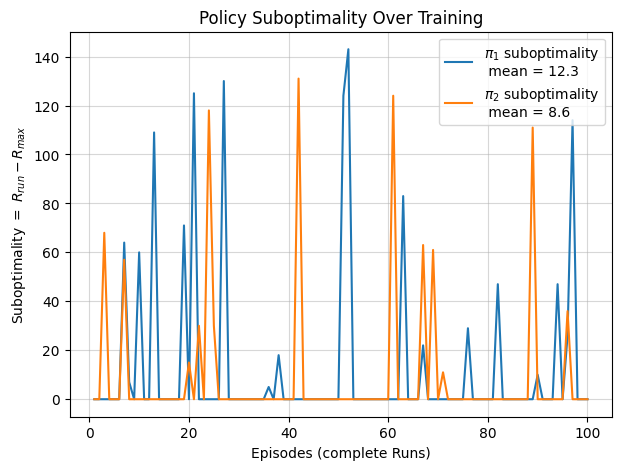

Evaluations over 100 episodes done for both policies


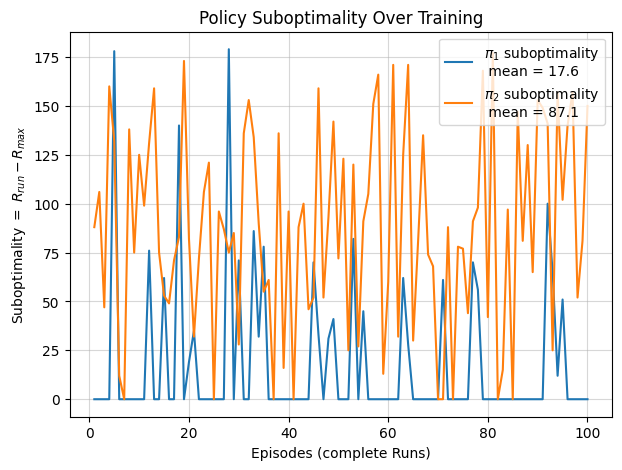

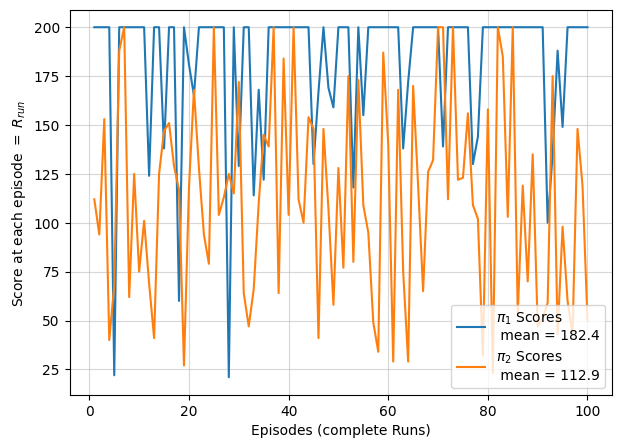

π₁ → length 200, total reward 200.0
π₂ → length 194, total reward 194.0
Collected 200 preference pairs.
[Update 1/40] Avg Loss: -34.5163
[Update 2/40] Avg Loss: -49.4886
[Update 3/40] Avg Loss: -49.2325
[Update 4/40] Avg Loss: -52.6893
[Update 5/40] Avg Loss: -57.3130
[Update 6/40] Avg Loss: -52.4102
[Update 7/40] Avg Loss: -61.2359
[Update 8/40] Avg Loss: -74.2279
[Update 9/40] Avg Loss: -61.2722
[Update 10/40] Avg Loss: -68.7087
[Update 11/40] Avg Loss: -66.5097
[Update 12/40] Avg Loss: -68.6803
[Update 13/40] Avg Loss: -64.2881
[Update 14/40] Avg Loss: -56.4633
[Update 15/40] Avg Loss: -55.3800
[Update 16/40] Avg Loss: -60.5542
[Update 17/40] Avg Loss: -62.1882
[Update 18/40] Avg Loss: -61.3939
[Update 19/40] Avg Loss: -72.7787
[Update 20/40] Avg Loss: -65.5552
[Update 21/40] Avg Loss: -75.8538
[Update 22/40] Avg Loss: -73.2287
[Update 23/40] Avg Loss: -66.2709
[Update 24/40] Avg Loss: -63.1217
[Update 25/40] Avg Loss: -70.9865
[Update 26/40] Avg Loss: -69.9399
[Update 27/40] Avg Lo

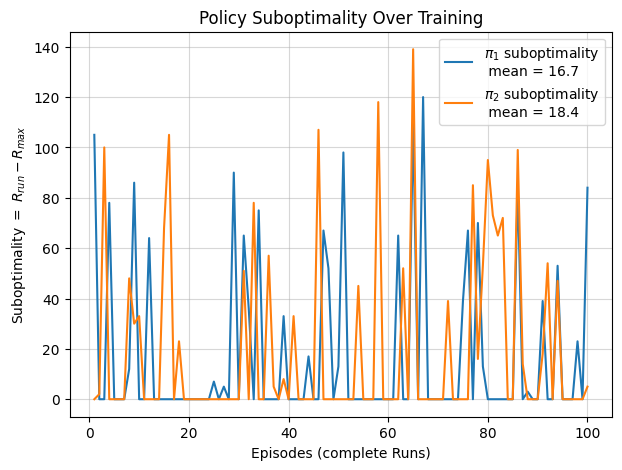

Evaluations over 100 episodes done for both policies


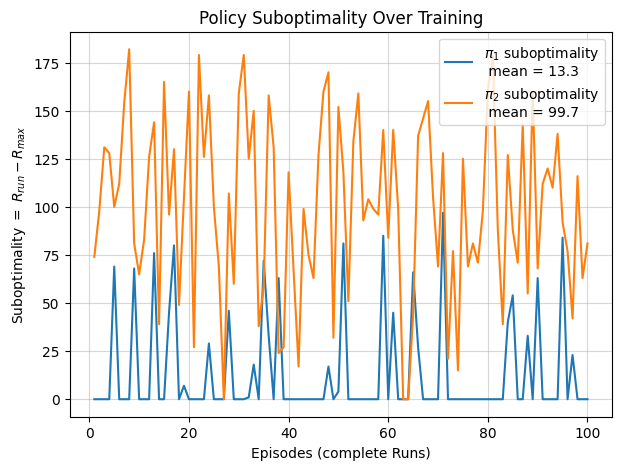

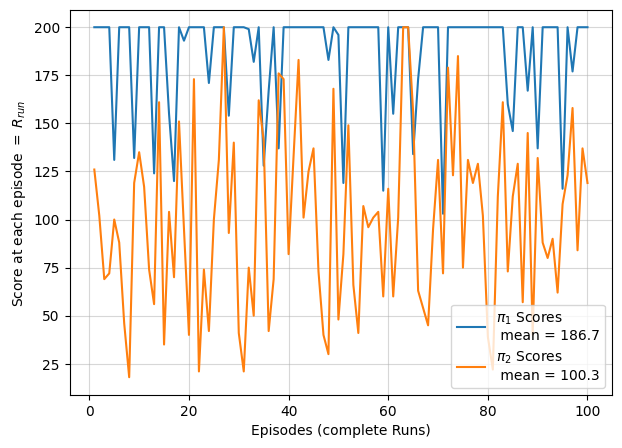

π₁ → length 200, total reward 200.0
π₂ → length 127, total reward 127.0
Collected 200 preference pairs.
[Update 1/40] Avg Loss: -51.1846
[Update 2/40] Avg Loss: -51.7985
[Update 3/40] Avg Loss: -49.0811
[Update 4/40] Avg Loss: -43.2842
[Update 5/40] Avg Loss: -46.6576
[Update 6/40] Avg Loss: -42.4305
[Update 7/40] Avg Loss: -43.9858
[Update 8/40] Avg Loss: -55.9161
[Update 9/40] Avg Loss: -66.3948
[Update 10/40] Avg Loss: -69.9851
[Update 11/40] Avg Loss: -79.4590
[Update 12/40] Avg Loss: -83.7601
[Update 13/40] Avg Loss: -90.4461
[Update 14/40] Avg Loss: -85.0068
[Update 15/40] Avg Loss: -78.3419
[Update 16/40] Avg Loss: -73.0533
[Update 17/40] Avg Loss: -62.2560
[Update 18/40] Avg Loss: -59.8834
[Update 19/40] Avg Loss: -56.8883
[Update 20/40] Avg Loss: -61.7357
[Update 21/40] Avg Loss: -69.1919
[Update 22/40] Avg Loss: -72.2123
[Update 23/40] Avg Loss: -70.4209
[Update 24/40] Avg Loss: -80.7531
[Update 25/40] Avg Loss: -72.8323
[Update 26/40] Avg Loss: -77.8587
[Update 27/40] Avg Lo

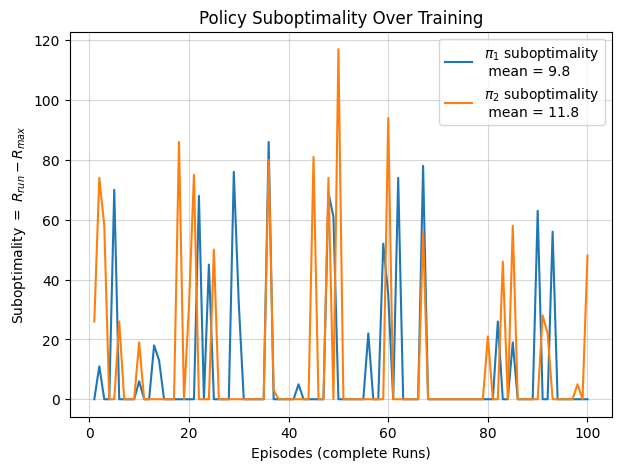

In [9]:
seeds_list=[42,100,35]
for seed in seeds_list:
    # Choose environment:

    # env 1: CartPole-v0
    env_name='CartPole-v0'
    baseline = baseline_CartPole_v0_Fla
    target_score = 185 # for CartPole-v0
    torch.manual_seed(seed)
    # env 2: Continuous-MountainCar-v0
    # env_name='MountainCar-v0'
    # baseline = baseline_MountainCar
    # target_score = -110 # for Continuous-MountainCar-v0

    lr_oppo = 0.003 # learning rate for OPPO

    load_policies = True

    # ── Hyperparams for OPPO ──
    n_episodes              = 1200 # keep same “number of iterations” for fair comparison
    max_t                   = 200  # cap on steps per episode
    print_every             = 20   # print every x episodes and avg also the score for every x episodes
    gamma                   = 0.99

    seed_training_policies  = seed


    # ── Instantiate the two policies & optimizers for OPPO ──
    env_oppo   = gym.make(env_name)

    pi1_oppo = Policy(state_size=env_oppo.observation_space.shape[0],
                        action_size=env_oppo.action_space.n).to(device)
    opt1_oppo    = torch.optim.Adam(pi1_oppo.parameters(), lr=lr_oppo)

    pi2_oppo = Policy(state_size=env_oppo.observation_space.shape[0],
                        action_size=env_oppo.action_space.n).to(device)
    opt2_oppo   = torch.optim.Adam(pi2_oppo.parameters(), lr=lr_oppo)


    # ── Load the policies if you want to reuse them ──
    if load_policies:
        pi1_oppo.load_state_dict(torch.load(f"pi1_oppo_{env_name}_seed_{seed}.pth"))


    # ── Run the OPPO training ──
    if not load_policies:
    # Training the policy:
        scores_oppo = OPPO_update(
            policy       = pi1_oppo,
            optimizer    = opt1_oppo,
            env          = env_oppo,
            baseline     = baseline,
            n_episodes   = n_episodes,
            max_t        = max_t,
            gamma        = gamma,      # you can reuse your PPO γ
            print_every  = print_every,
            early_stop   = False,
            seed = seed_training_policies,
            target_score = target_score,
            env_name= env_name,
            display_every = False
        )

    pi2_oppo.load_state_dict(torch.load(f"pi2_oppo_{env_name}_seed_{seed}.pth"))


    # seed_evaluation = 26
    num_episodes = 100
    pi1_mean_reward, pi1_reward = evaluate_policy(pi1_oppo, env_oppo, n_episodes=num_episodes)
    pi2_mean_reward, pi2_reward = evaluate_policy(pi2_oppo, env_oppo, n_episodes=num_episodes)
    print("Evaluations over", num_episodes, "episodes done for both policies")

    plot_suboptimality(
        pi1_reward,
        pi2_reward,
        max_reward=200, # for CartPole-v0
    )

    plot_Scores(
        pi1_reward,
        pi2_reward,
    )
    traj1 = generate_trajectory(pi1_oppo, env_oppo, max_steps=1000)
    traj2 = generate_trajectory(pi2_oppo, env_oppo, max_steps=1000)

    print(f"π₁ → length {len(traj1)}, total reward {sum(s['reward'] for s in traj1):.1f}")
    print(f"π₂ → length {len(traj2)}, total reward {sum(s['reward'] for s in traj2):.1f}")
    K=200
    prefs = sample_preference_pairs(pi1_oppo, pi2_oppo, env_oppo, K=K) # Need to define K elsewhere as hyperparameter
    print(f"Collected {len(prefs)} preference pairs.")
    reward_model=RewardModel(state_dim=env_oppo.observation_space.shape[0],
                     action_dim=env_oppo.action_space.n).to(device)
    reward_model.load_state_dict(torch.load(f"reward_model_youss.pth"))

    lr_RLHF=0.009

    policy_RLHF=Policy(state_size=env_oppo.observation_space.shape[0],
                        action_size=env_oppo.action_space.n).to(device)
    policy_ref=pi1_oppo
    #policy_ref=pi2_oppo
    opt_RLHF    = torch.optim.Adam(policy_RLHF.parameters(), lr=lr_RLHF)
    policy_RLHF.load_state_dict(torch.load(f"pi2_oppo_{env_name}_seed_{seed}.pth"))
    #policy_DPO.load_state_dict(torch.load(f"pi1_oppo_{env_name}_seed_{seed}.pth"))

    beta=0.5

    train_policy_from_rollouts_n_updates(policy_RLHF,policy_ref,reward_model,env_oppo,opt_RLHF,N=40,K=100,max_steps=500,beta=beta)
    torch.save(policy_RLHF.state_dict(), f"pi_RLHF_{env_name}_seed_{seed}_beta{beta}_K{K}.pth")
    print(f"Saved final policy as pi_RLHF_{env_name}_seed_{seed}_beta{beta}_K{K}.pth")
    num_episodes = 100
    pi1_mean_reward, pi1_reward = evaluate_policy(policy_RLHF, env_oppo, n_episodes=num_episodes)
    pi2_mean_reward, pi2_reward = evaluate_policy(policy_ref, env_oppo, n_episodes=num_episodes)

    plot_suboptimality(
        pi1_reward,
        pi2_reward,
        200,
    )  # in cartpole, 200 is the maximum reward



Averaging over the different seeds

In [14]:
file_pi1=[f"pi1_oppo_{env_name}_seed_{seed}.pth"]
file_pi2=[f"pi2_oppo_{env_name}_seed_{seed}.pth"]
file_pi_DPO=[f"pi_DPO_oppo_{env_name}_seed_{seed}.pth",f"pi_DPO_oppo_{env_name}_seed_{seed}_K200.pth",f"pi_DPO_oppo_{env_name}_seed_{seed}_beta0.005.pth",f"pi_DPO_oppo_{env_name}_seed_{seed}_beta1_invverted.pth"]

import torch
import numpy as np
import os

def load_policy(file_path, state_dim, action_dim, device="cpu"):
    policy = Policy(state_size=state_dim, action_size=action_dim).to(device)
    policy.load_state_dict(torch.load(file_path, map_location=device))
    return policy

def evaluate_all_policies(env, seeds, env_name, num_episodes=10, device="cpu"):
    results = {}

    # === PI1 and PI2 (vary by seed) ===
    for label in ["pi1", "pi2"]:
        returns = []
        rewards_list=np.zeros(num_episodes)
        for seed in seeds:
            file_path = f"{label}_oppo_{env_name}_seed_{seed}.pth"
            if not os.path.exists(file_path):
                print(f"Missing file: {file_path}")
                continue

            policy = load_policy(file_path, env.observation_space.shape[0], env.action_space.n, device)
            mean_return, rewards_per_ep = evaluate_policy(policy, env, n_episodes=num_episodes)
            returns.append(mean_return)
            rewards_list+=rewards_per_ep
        results[label] = {
            "mean": np.mean(returns),
            "std": np.std(returns),
            "per_seed": returns,
            "graph":rewards_list/len(seeds)
        }

    # === PI_DPO variants (filename includes other params) ===
    pi_DPO_files = [
        
        f"pi_RLHF_{env_name}_seed_{seed}_beta0.5_K200.pth"
    ]

    for file_template in pi_DPO_files:
        label = os.path.splitext(file_template)[0].replace("pi_RLHF_oppo_", "").replace("_seed_{seed}", "")
        returns = []
        rewards_list=np.zeros(num_episodes)
        for seed in seeds:
            file_path = file_template#.format(seed=seed)
            if not os.path.exists(file_path):
                print(f"Missing file: {file_path}")
                continue

            policy = load_policy(file_path, env.observation_space.shape[0], env.action_space.n, device)
            mean_return, rewards_per_ep = evaluate_policy(policy, env, n_episodes=num_episodes)
            returns.append(mean_return)
            rewards_list+=rewards_per_ep
        results[f"pi_RLHF_{label}"] = {
            "mean": np.mean(returns),
            "std": np.std(returns),
            "per_seed": returns,
            "graph":rewards_list/len(seeds)
        }

    return results



In [15]:
results=evaluate_all_policies(env_oppo,seeds_list,env_name,50)

C:\Users\youss\AppData\Local\Temp\ipykernel_34760\1171362696.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy.load_state_dict(torch.load(file_path, map_location=d

dict_keys(['pi1', 'pi2', 'pi_RLHF_pi_RLHF_CartPole-v0_seed_35_beta0.5_K200'])


c:\Users\youss\OneDrive\Bureau\master epfl\MA2\RL\projet\RL-RLHF\Plot_Functions.py:19: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(updates1, reward_hist_pi1, label=f"$\pi_1$ Scores \n mean = {np.mean(reward_hist_pi1):.1f}")
c:\Users\youss\OneDrive\Bureau\master epfl\MA2\RL\projet\RL-RLHF\Plot_Functions.py:20: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(updates2, reward_hist_pi2, label=f"$\pi_2$ Scores \n mean = {np.mean(reward_hist_pi2):.1f}")
c:\Users\youss\OneDrive\Bureau\master epfl\MA2\RL\projet\RL-RLHF\Plot_Functions.py:48: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(updates1, sub1, label=f"$\pi_1$ suboptimality \n mean = {np.mean(sub1):.1f}")
c:\Users\youss\OneDrive\Bureau\master epfl\MA2\RL\projet\RL-RLHF\Plot_Functions.py:49: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(updates2, sub2, label=f"$\pi_2$ suboptimality \n mean = {np.mean(sub2):.1f}")


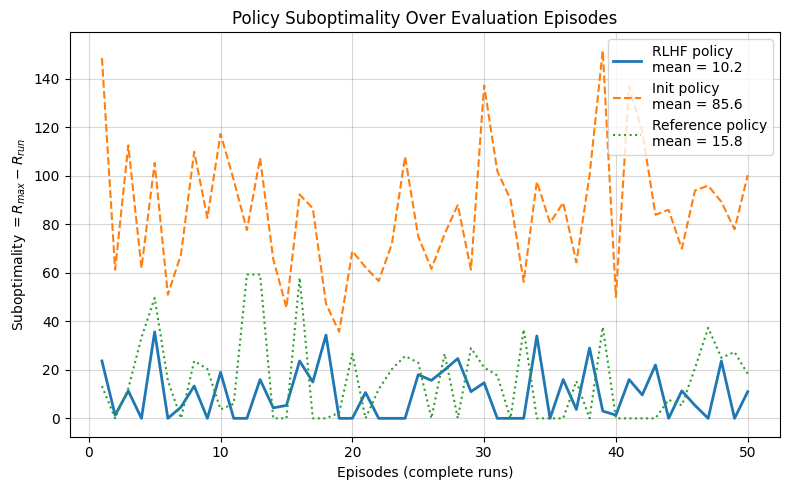

In [18]:
# Example labels: 'pi_DPO_', 'pi1', 'pi2'
print(results.keys())
reward_hist_init = results["pi2"]["graph"]
reward_hist_ref = results["pi1"]["graph"]
reward_hist_RLHF = results["pi_RLHF_pi_RLHF_CartPole-v0_seed_35_beta0.5_K200"]["graph"]

plot_suboptimality_three_policies(reward_hist_RLHF, reward_hist_init, reward_hist_ref, max_reward=200,algo="RLHF")

# reward_hist_dpo = results["pi_DPO_pi_DPO_CartPole-v0_seed_35_K200"]["graph"]

# plot_suboptimality_three_policies(reward_hist_dpo, reward_hist_init, reward_hist_ref, max_reward=200)
# reward_hist_dpo = results["pi_DPO_pi_DPO_CartPole-v0_seed_35_beta0.005"]["graph"]

# plot_suboptimality_three_policies(reward_hist_dpo, reward_hist_init, reward_hist_ref, max_reward=200)
# reward_hist_dpo = results["pi_DPO_pi_DPO_CartPole-v0_seed_35_beta0.5_K10"]["graph"]

# plot_suboptimality_three_policies(reward_hist_dpo, reward_hist_init, reward_hist_ref, max_reward=200)


# reward_hist_dpo = results["pi_DPO_pi_DPO_CartPole-v0_seed_35_beta1_inverted"]["graph"]
# reward_hist_init = results["pi1"]["graph"]
# reward_hist_ref = results["pi2"]["graph"]
# plot_suboptimality_three_policies(reward_hist_dpo, reward_hist_init, reward_hist_ref, max_reward=200)